# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [6]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

!python -m pip install jupyter-console==6.6.3 jupyter-client>=7.0.0 ipykernel>=6.14 prompt-toolkit>=3.0.30 --no-cache --upgrade --force-reinstall


### Important: Restart the Kernel at this moment

In [7]:
# Restart the Kernel before you execute this command.
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached ipykernel-4.10.0-py3-none-any.whl (109 kB)
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.16.2
    Uninstalling ipykernel-6.16.2:
      Successfully uninstalled ipykernel-6.16.2


## Imports

In [9]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [10]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image with mean=0.5, std=0.5
])

# Create training set and define training dataloader
## YOUR CODE HERE ##
train_dataset = torchvision.datasets.MNIST(
    root='mnist_data',  # Directory where MNIST data will be stored
    train=True,  # Use the training set
    transform=transform,  # Apply defined transforms
    download=True  # Download the dataset if not already available
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=32,  # Batch size
    shuffle=True  # Shuffle the training data
)
# Create test set and define test dataloader
## YOUR CODE HERE ##

test_dataset = torchvision.datasets.MNIST(
    root='mnist_data',  # Directory where MNIST data will be stored
    train=False,  # Use the test set
    transform=transform,  # Apply defined transforms
    download=True  # Download the dataset if not already available
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=32,  # Batch size
    shuffle=False  # No need to shuffle the test data
)

# Verification (optional)
# Print shapes of a batch from the train loader
print("download MNIST dataset successfully. \nNow iterate train_loader to check dataset")
data_iter = iter(train_loader)
images, labels = next(data_iter)

print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")


download MNIST dataset successfully. 
Now iterate train_loader to check dataset
Images batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**
for the transform choice:
1. transforms.ToTensor() to convert dataset to Pytorch expected tensor format.
2. I use transforms.Normalize((0.5,), (0.5,))  mean 0.5 and std 0.5 as previous course example which bacause of MNIST dataset grayscale and pixel in middle. Normalize will help to grad descent more effecient. 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [11]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

1


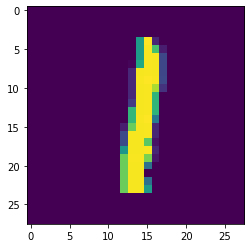

2


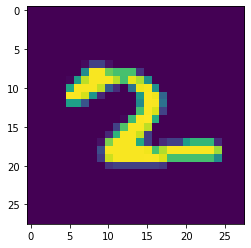

0


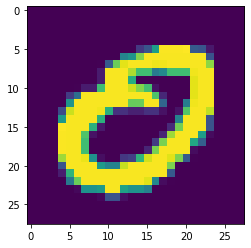

5


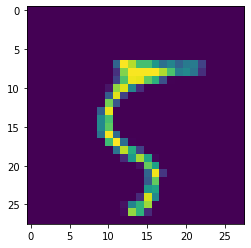

8


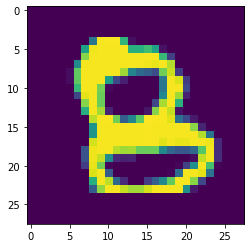

In [12]:
# Explore data
## YOUR CODE HERE ##
# # Create the training dataset
# training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=ToTensor())
# # Create the training dataloader with batch size 5
# train_loader = DataLoader(training_data, batch_size=5)

# View 5 images using the show5 function
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [14]:
## YOUR CODE HERE ##
# Define the class for your neural network. base on MNIST dataset 28*28=784
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device
net.to(device)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [15]:
## YOUR CODE HERE ##
# # Instantiate the model
# model = Net()

# Choose a loss function
criterion = nn.CrossEntropyLoss()

# Specify the optimizer
# Using Adam optimizer for its efficiency in handling sparse gradients and adaptivity
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Print a summary of the model, loss function, and optimizer
print("Model Summary:")
print(net)
print("\nLoss Function:", criterion)
print("\nOptimizer:", optimizer)

Model Summary:
Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Loss Function: CrossEntropyLoss()

Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

Using device: cuda
Epoch [1/5], Batch [250/1875], Loss: 0.0095
Epoch [1/5], Batch [500/1875], Loss: 0.0074
Epoch [1/5], Batch [750/1875], Loss: 0.0086
Epoch [1/5], Batch [1000/1875], Loss: 0.0383
Epoch [1/5], Batch [1250/1875], Loss: 0.1764
Epoch [1/5], Batch [1500/1875], Loss: 0.0385
Epoch [1/5], Batch [1750/1875], Loss: 0.0067
Epoch [1/5] completed. Average Loss: 0.0511
Epoch 1 training accuracy: 0.98% training loss: 0.05109
Epoch 1 validation accuracy: 0.97% validation loss: 0.10510
Epoch [2/5], Batch [250/1875], Loss: 0.2471
Epoch [2/5], Batch [500/1875], Loss: 0.1298
Epoch [2/5], Batch [750/1875], Loss: 0.0022
Epoch [2/5], Batch [1000/1875], Loss: 0.0501
Epoch [2/5], Batch [1250/1875], Loss: 0.0002
Epoch [2/5], Batch [1500/1875], Loss: 0.0034
Epoch [2/5], Batch [1750/1875], Loss: 0.0030
Epoch [2/5] completed. Average Loss: 0.0450
Epoch 2 training accuracy: 0.99% training loss: 0.04501
Epoch 2 validation accuracy: 0.97% validation loss: 0.12903
Epoch [3/5], Batch [250/1875], Loss: 

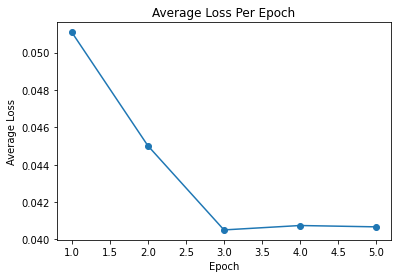

In [18]:
## YOUR CODE HERE ##
# Check for GPU availability and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the model to the selected device
net.to(device)

# Define number of epochs
num_epochs = 5

# Record average loss for each epoch
epoch_losses = []
train_loss_history = list()
val_loss_history = list()
# Training loop
for epoch in range(num_epochs):
    net.train()  # Set the model to training mode

    train_correct = 0    
    running_loss = 0.0  # Tracks the total loss for the epoch

    # Loop over batches
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move data to the device
        images, labels = images.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = net(images)
        # Compute loss
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()
        # Update parameters
        optimizer.step()

        # Accumulate loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).float().mean().item()
        running_loss += loss.item()
        
        # Print loss every 250 batches
        if (batch_idx + 1) % 250 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    # Record the average loss for this epoch
    avg_loss = running_loss / len(train_loader)
    epoch_losses.append(avg_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}] completed. Average Loss: {avg_loss:.4f}")
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {running_loss/len(train_loader):.5f}')
    train_loss_history.append(running_loss/len(train_loader))

    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).float().mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))
    
    

# Plot average loss per epoch
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o')
plt.title("Average Loss Per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.show()

Plot the training loss (and validation loss/accuracy, if recorded).

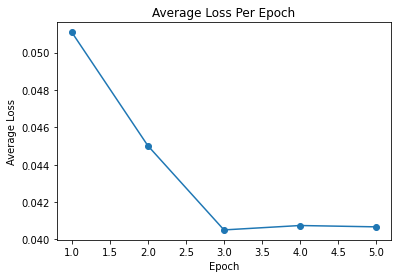

In [23]:
## YOUR CODE HERE ##
# Plot average loss per epoch
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o')
plt.title("Average Loss Per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.show()



## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [21]:
## YOUR CODE HERE ##
# Set the model to evaluation mode
net.eval()

# Initialize counters for correct predictions and total samples
correct = 0
total = 0

# Disable gradient calculation for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        # Move images and labels to the device
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = net(images)
        
        # Get predictions with the highest probability
        _, predicted = torch.max(outputs, 1)
        
        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 97.24%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [24]:
## YOUR CODE HERE ##
#increase epoch_num, bratch_size etc...


## Saving your model
Using `torch.save`, save your model for future loading.

In [26]:
## YOUR CODE HERE ##
# Define the file path where you want to save the model
model_save_path = "mnist_model.pth"

# Save the model's state_dict (recommended for PyTorch models)
torch.save(net.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

#########reload it
# Define the same model architecture as the saved model
model = Net()  # new instance of Net() model class
model.load_state_dict(torch.load("mnist_model.pth"))

# Move the model to the appropriate device
model.to(device)
model.eval()

print("Model loaded successfully!")


Model saved to mnist_model.pth
Model loaded successfully!
